**Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#checking overvier of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking shape 
data.shape

(7043, 21)

**So we can see that there are about 7043 columns and 21 rows in the dataset.**

In [6]:
#checking null values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**So we can see that there are no null values present in the dataset.**

In [7]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**So in this we can see that there is one column having float data type, 2 columns having integer data type and 18 columns having object data type.But column total charges data type is float type and over here it has given as object.so further i will check why it is showing like that.**

In [18]:
#checking how many unique numbers are there in column total charges
data['TotalCharges'].nunique()

6531

**So we can see that in column total number we have 6531 unique numbers.**

**since there are no null value present in the column i will check if there are any spaces.**

In [19]:
#checking if there are any spaces in the column
data.loc[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**so we can see that there are about 10 spaces in the column, so replacing them with the null values.**

In [20]:
#replacing space with the null values
data['TotalCharges']=data['TotalCharges'].replace({' ':np.nan})

In [21]:
#checking for null values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Changing the datatype of the column total charges to float**

In [23]:
#Changing the datatype of the column total charges to float
data['TotalCharges']=data['TotalCharges'].astype(float)

In [24]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Now we can see that the data type of the column have been changed fl;oa from object. so now we have 2 columns having float data type. 3 columns having integer datatype, among this column senior citizen encoded one thats why it is showinf as integer data type and rest are that is 17 columns are having object data type.**

In [25]:
#filling the null values'
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [26]:
#checking for null values'
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**So we can see that null values have been filled.**

In [27]:
#checking columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**This are the names of the columns.**

**Dropping column customer id as i dont find relevant at the time of prediction.**

In [28]:
data=data.drop(['customerID'],axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [29]:
#checking duplicates
data.duplicated().sum()

22

**So we can see that there are 22 duplicates present in the dataset.**

In [30]:
#dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(7021, 20)

**So we can see that duplicates have been dropped from the dataset.**

In [31]:
#checking dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.342338
std,0.368947,24.534965,30.069001,2265.044153
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
#checking for unique values
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

**This column gives us the information about whether the customer is male or female.**

In [33]:
#checking for unique values
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

**This column gives us the information about whether the customer is senior citizen or not.**

In [34]:
#checking for unique values
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

**This column gives us the information about whether customer have any partner or not.**

In [35]:
#checking for unique values
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

**This column gives us the information about whether customer have any dependents or not.**

In [36]:
#checking for unique values
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

**This column gives us the information about the months or years customer using a particular service.**

In [37]:
#checking for unique values
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

**This column gives us the information about whether customer is using phone service or not.**

In [38]:
#checking for unique values
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

**This column gives us the infirmation about whether the customer have multiple lines or not,or he does not use phone service,**

In [39]:
#checking for unique values
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

**This column gives us the infirmation about which internet service customer are using whether it is DSL,fiber optic or doesnt use any service.**

In [40]:
#checking for unique values
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

**This column gives us the information about whether there is online security or not for the internet service which is used by the customer or he does not use any internet service.**

In [41]:
#checking for unique values
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

**This column gives us the information about whether there is online backup or not for the internet service which is used by the customer or he does not use any internet service.**

In [42]:
#checking for unique values
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

**This column gives us the information about whether there is any protection for device or not for the internet service which is used by the customer or he does not use any internet service.**

In [43]:
#checking for unique values
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

**This column gives us the information about whether there is any techsupport or not for the internet service which is used by the customer or he does not use any internet service.**

In [44]:
#checking for unique values
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

**This column gives us the information about whether there is any live streaming tv or not for the internet service which is used by the customer or he does not use any internet service.**

In [45]:
#checking for unique values
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

**This column gives us the information about whether there are streaming movies or not for the internet service which is used by the customer or he does not use any internet service.**

In [46]:
#checking for unique values
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**This column gives us the information about the contract done by the customer with internet service provider or the phone service provider, whether it is month to month or it is one year contract or two year contract.**

In [47]:
#checking for unique values
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

**This column gives us the information about whether the billing is paperlessbilling or not.**

In [48]:
#checking for unique values
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

**This column gives us the information about the payment methods, like whether it is electronic check or mailed check or bank transfer(automatic) or credit card(automatic).**

In [49]:
#checking for unique values
data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

**This column gives us the information about the monthly charges paid by the customer.**

In [50]:
#checking for unique values
data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

**This column gives us the information about the total charges paid by the customer.**

In [51]:
#checking for unique values
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

**This column gives us the information about the customer attrition or customer churn, the Customer churn is when a company’s customers stop doing business with that company.**

In [52]:
#checking number of unique values
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**So we can see the number of unique values present in each columns.**

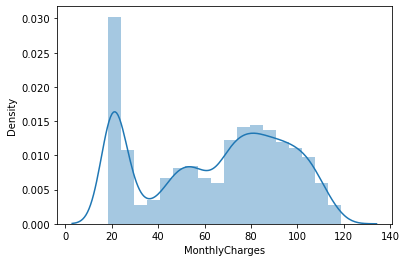

In [53]:
#plotting distribution plot
sns.distplot(data['MonthlyCharges'],kde=True)
plt.show()

**In this plot we can see that skewness may be present and data is not normally distributed.**

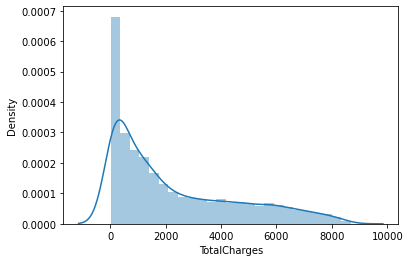

In [54]:
#plotting distribution plot
sns.distplot(data['TotalCharges'],kde=True)
plt.show()

**In this plot we can see that there might be skewness present in the dataset.and data is not normally dustributed.**

Male      3541
Female    3480
Name: gender, dtype: int64


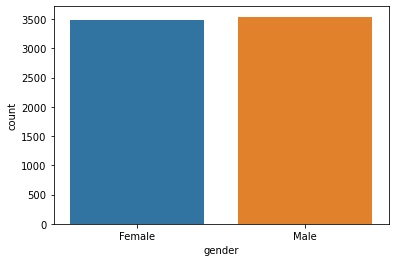

In [55]:
#plotting count plot
sns.countplot(x='gender',data=data)
print(data['gender'].value_counts())
plt.show()

**In this plot we can see males are slightly higher than the female customer.**

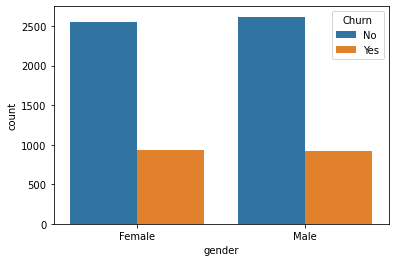

In [56]:
#plotting count plot
sns.countplot(x='gender',hue='Churn',data=data)
plt.show()

**In this plot we can see that same approx same amount of male and female have stayed with the same company and appox same amount make and female have left the company.**

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


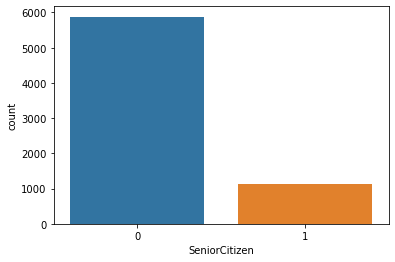

In [57]:
#plotting count plot
sns.countplot(x='SeniorCitizen',data=data)
print(data['SeniorCitizen'].value_counts())
plt.show()

**Since this column is the encoded one, so considering No=0 and Yes=1 as per alphabetical order, so in this plot we can see that around 5880 of the customers are not senior citizens and 1141 of the customers are senior citizens.**

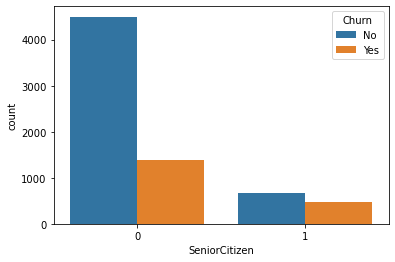

In [58]:
#plotting count plot
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)
plt.show()

**In this plot we can see that most of the customers who are not senior citizen and also who are senior citizen they have not left the company or the service provider as compared to the ones who have left.**

No     3619
Yes    3402
Name: Partner, dtype: int64


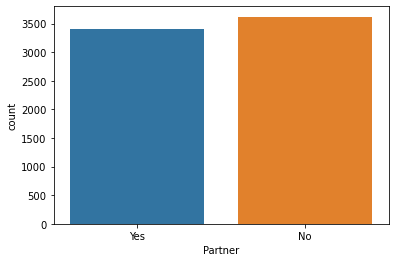

In [59]:
#plotting count plot
sns.countplot(x='Partner',data=data)
print(data['Partner'].value_counts())
plt.show()

**In this plot we can see that most of the customers that is 3619  of them dont have any partners and 3402 customers are having partner.**

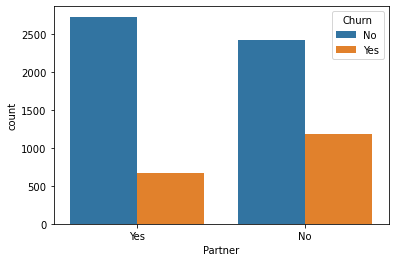

In [60]:
#plotting count plot
sns.countplot(x='Partner',hue='Churn',data=data)
plt.show()

**In this plot we can see that most of the customers who have partner also who dont have partner have stayed with the same company as compared to the ones who have left, and customers who are single have left more as per to the ones who have partner.**

No     4911
Yes    2110
Name: Dependents, dtype: int64


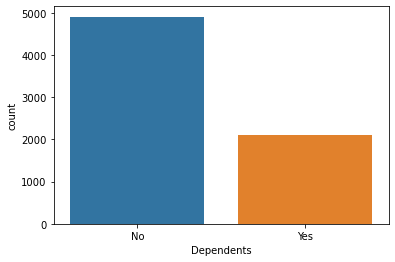

In [61]:
#plotting count plot
sns.countplot(x='Dependents',data=data)
print(data['Dependents'].value_counts())
plt.show()

**So in this plot we can see that around 4911 customers does not have any dependents and around 2110 customers have dependents.**

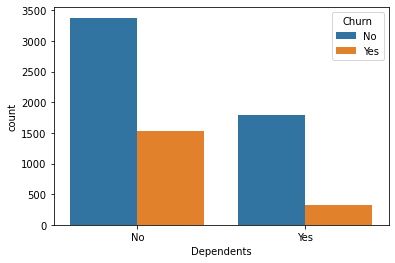

In [62]:
#plotting count plot
sns.countplot(x='Dependents',hue='Churn',data=data)
plt.show()

**In this plot we can see that customers who dont have dependents as well as the ones who have dependents,most of them have stayed with the companies as compared to the ones who have left, and the customers with the dependents have left the company more than the ones who have the dependents.**

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


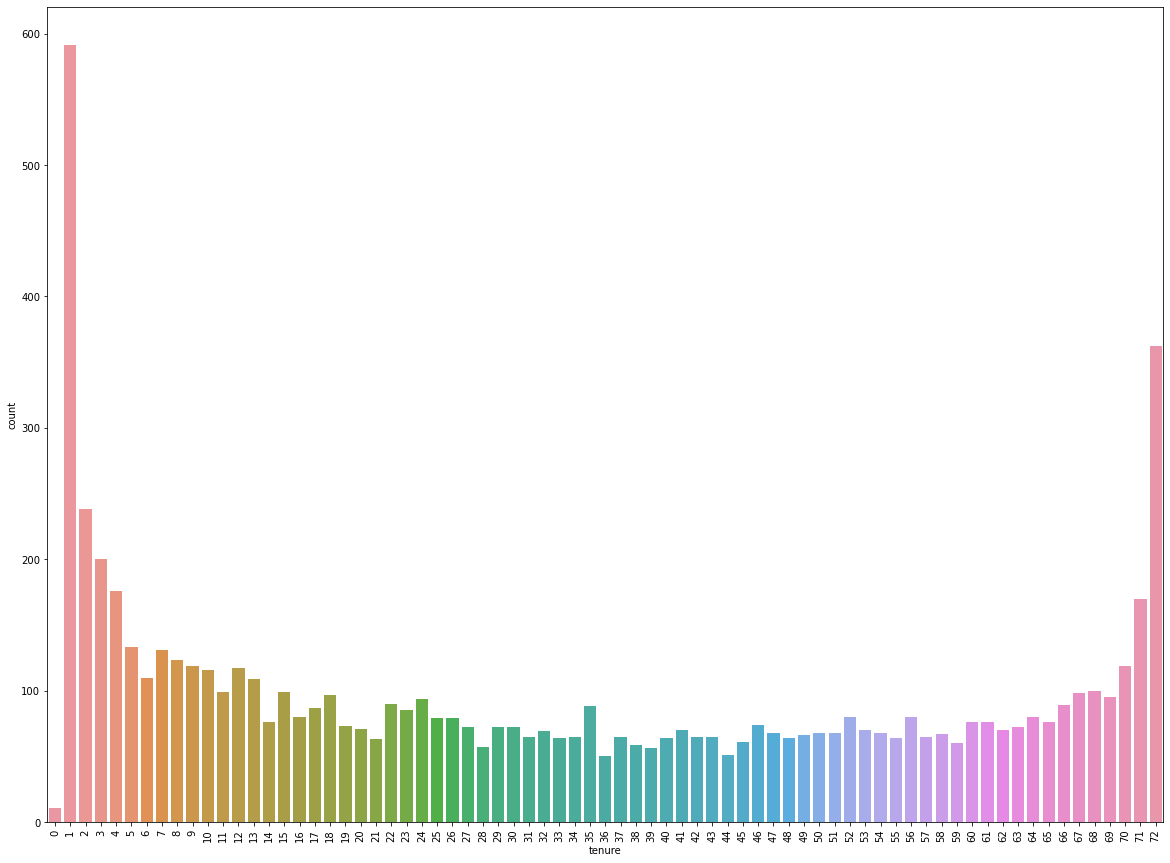

In [63]:
#plotting count plot
plt.figure(figsize=(20,15))
sns.countplot(x='tenure',data=data)
plt.xticks(rotation='vertical')
print(data['tenure'].value_counts())
plt.show()

**In this plot we can see that most of the people are having a tenure of 1 month with service provider, this is because first they want to check how it goes, how they providing service and other aspectts.and 11 of them are like they did'nt last like one month also because of some issues.**

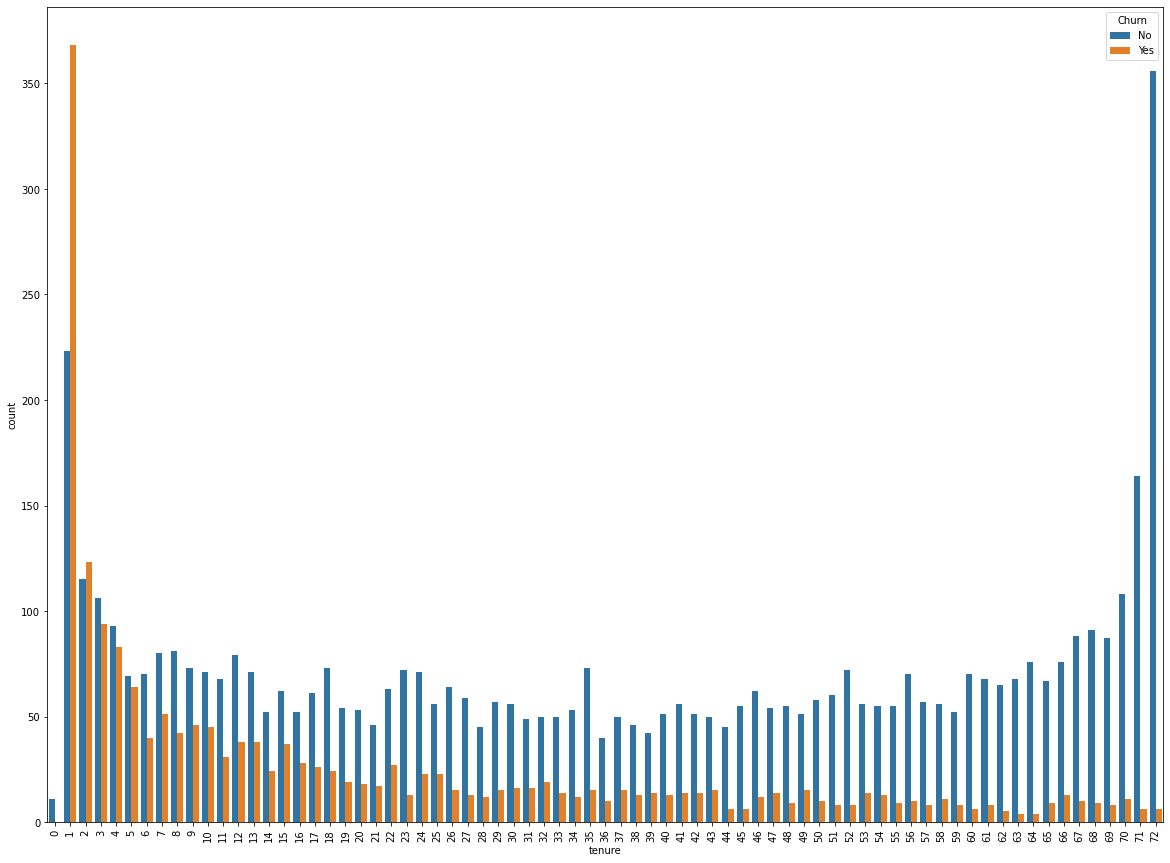

In [64]:
#plotting count plot
plt.figure(figsize=(20,15))
sns.countplot(x='tenure',hue='Churn',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the customers with tenure of 1 month have left and most of the cusomers with tenure of 72 months have stayed .**

Yes    6339
No      682
Name: PhoneService, dtype: int64


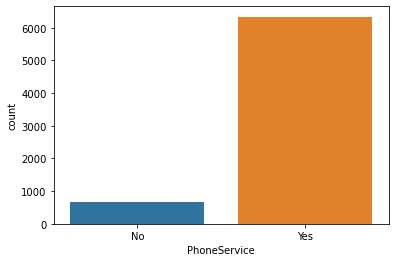

In [65]:
#plotting count plot
sns.countplot(x='PhoneService',data=data)
print(data['PhoneService'].value_counts())
plt.show()

**In this plot we can see that around 6339 customers are using phone service and around 682 are not using.**

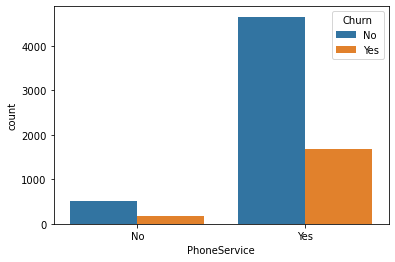

In [66]:
#plotting count plot
sns.countplot(x='PhoneService',hue='Churn',data=data)
plt.show()

**In this plot we can see that customers having phone service have stayed with the same companies most than the ones who dont have phone service.**

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


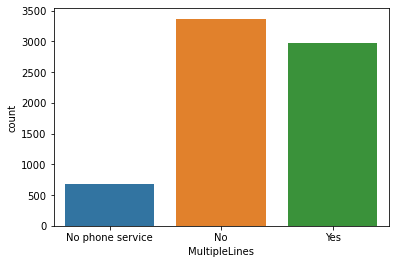

In [67]:
#plotting count plot
sns.countplot(x='MultipleLines',data=data)
print(data['MultipleLines'].value_counts())
plt.show()

**In this plot we can see that around 3368 customers are not using multiple lines,while 2971 customers are using it and around 682 customers does have phone service.**

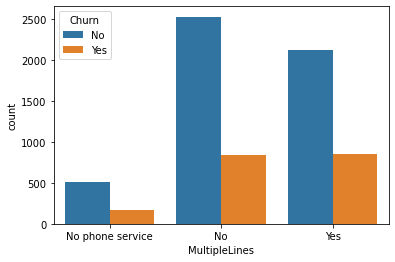

In [68]:
#plotting count plot
sns.countplot(x='MultipleLines',hue='Churn',data=data)
plt.show()

**In this plot we can see that customers who dont use multiple lines have stayed the most in this dataset followed by the ones who are using the multiple lines.**

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


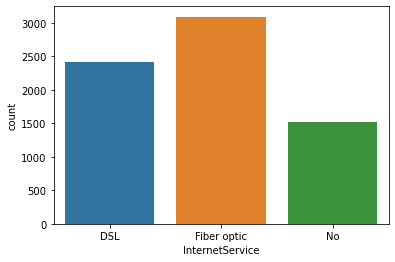

In [69]:
#plotting count plot
sns.countplot(x='InternetService',data=data)
print(data['InternetService'].value_counts())
plt.show()

**In this plot we can see that around 3090 customers are using internet through fibre optic, around 2419 are using internet through DSL adn around 1512 are not using internet.**

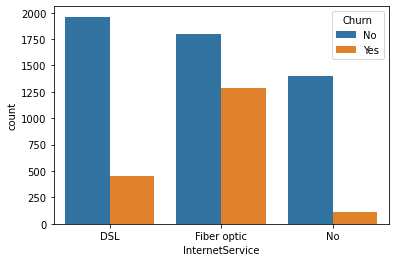

In [70]:
#plotting count plot
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.show()

**In this plot we can see that customer using the intenet through DSL have stayed with the comoany the most and the ones using fibre optic have left the most.**

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


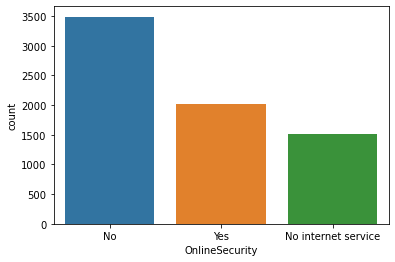

In [71]:
#plotting count plot
sns.countplot(x='OnlineSecurity',data=data)
print(data['OnlineSecurity'].value_counts())
plt.show()

**In this plot we can see that around 3490 customers who are using internet service dont have online security while 2019 customers have online security and 1512 customers does not use internet.**

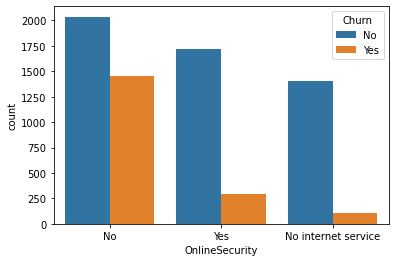

In [72]:
#plotting count plot
sns.countplot(x='OnlineSecurity',hue='Churn',data=data)
plt.show()

**In this plot we can see that customer who are using internet service who does not have online security have stayed the most and also left the most**

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


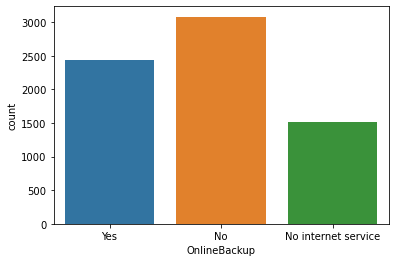

In [73]:
#plotting count plot
sns.countplot(x='OnlineBackup',data=data)
print(data['OnlineBackup'].value_counts())
plt.show()

**In this plot we can see that around 3080 customers who are using internet service dont have online backup while 2429 customess have online backup and 1512 customers does not use internet.**

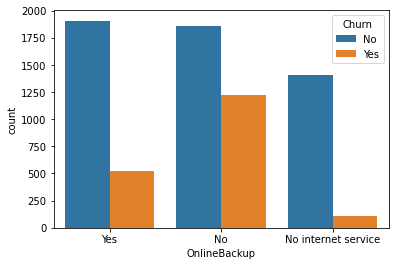

In [74]:
#plotting count plot
sns.countplot(x='OnlineBackup',hue='Churn',data=data)
plt.show()

**In this plot we can see that customer who are using internet service who have online backup have stayed the most and the ones who have does not have online backup have left the most.**

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


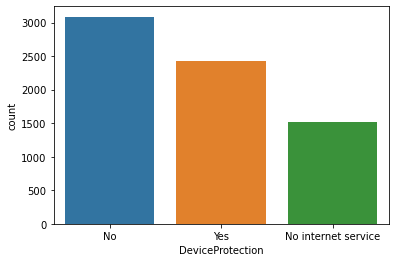

In [75]:
#plotting count plot
sns.countplot(x='DeviceProtection',data=data)
print(data['DeviceProtection'].value_counts())
plt.show()

**In this plot we can see that around 3087 customers who are using internet service dont have device protection while 2422 customers have device protection and 1512 customers does not use internet.**

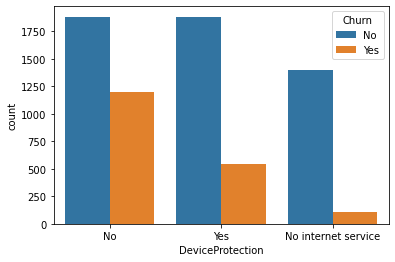

In [76]:
#plotting count plot
sns.countplot(x='DeviceProtection',hue='Churn',data=data)
plt.show()

**In this plot we can see that customer who are using internet service and who does not have devicd protection as well as the ones who have device protection have stayed with the company and the customers who does not have device protection have left the most.**

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


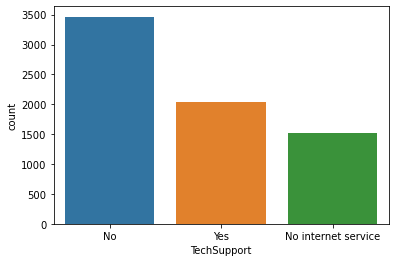

In [77]:
#plotting count plot
sns.countplot(x='TechSupport',data=data)
print(data['TechSupport'].value_counts())
plt.show()

**In this plot we can see that around 3465 customers who are using internet service dont have techsupport while 2044 customers have techsupport and 1512 customers does not use internet.**

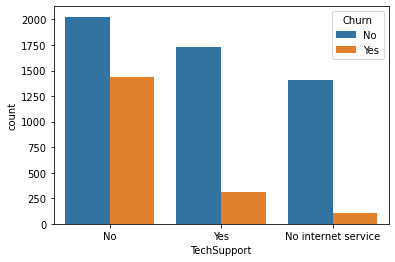

In [78]:
#plotting count plot
sns.countplot(x='TechSupport',hue='Churn',data=data)
plt.show()

**In this plot we can see that customer who are using internet service and who does not have tech support have stayed with the company and aslo the customers who does not have tech support have left the most.**

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


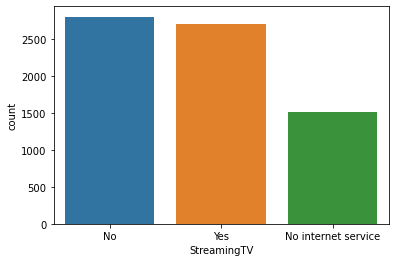

In [79]:
#plotting count plot
sns.countplot(x='StreamingTV',data=data)
print(data['StreamingTV'].value_counts())
plt.show()

**In this plot we can see that around 2802 customers who are using internet service dont have internet tv or streaming tv while 2702 customers have streaming tv and 1512 customers does not use internet.**

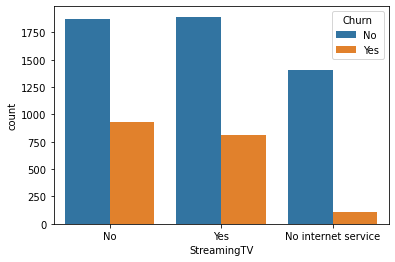

In [80]:
#plotting count plot
sns.countplot(x='StreamingTV',hue='Churn',data=data)
plt.show()

**In this plot we can see that we can see that customer who are using internet service and who dont have streaming tv and also the ones who have streaming tv have stayed.**

No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


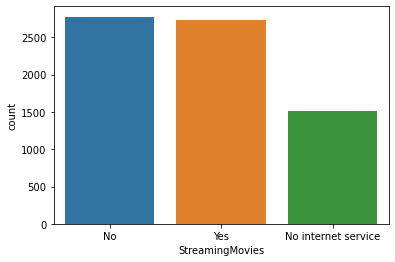

In [81]:
#plotting count plot
sns.countplot(x='StreamingMovies',data=data)
print(data['StreamingMovies'].value_counts())
plt.show()

**In this plot we can see that around 2770 customers who are using internet service dont have streaming movies while 2732 customers have streaming movies and 1512 customers does not use internet.**

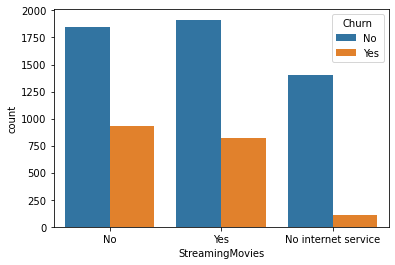

In [82]:
#plotting count plot
sns.countplot(x='StreamingMovies',hue='Churn',data=data)
plt.show()

**In this plot we can see that we can see that customer who are using internet service and who dont have streaming movies and also the ones who have streaming tv have stayed.**

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


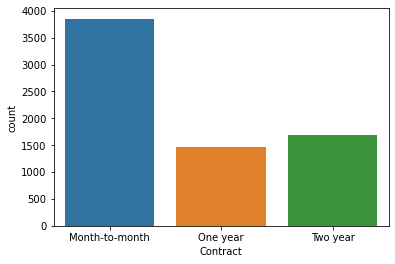

In [83]:
#plotting count plot
sns.countplot(x='Contract',data=data)
print(data['Contract'].value_counts())
plt.show()

**In this plot we can see that around 3853 customers  are having month to month contract while 1695 customers are ahving two year contract and 1473 customers are having one year contract.**

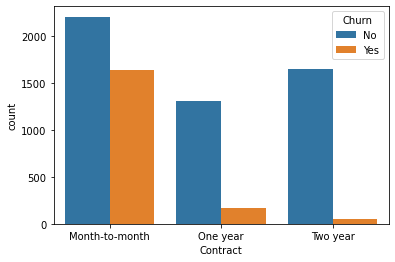

In [84]:
#plotting count plot
sns.countplot(x='Contract',hue='Churn',data=data)
plt.show()

**In this plot we can see that customers who have done month to month contract hav stayed the most and customers who have done tow year contract have left the least.**

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


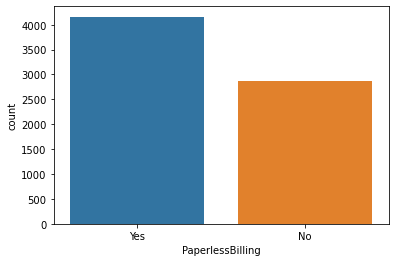

In [85]:
#plotting count plot
sns.countplot(x='PaperlessBilling',data=data)
print(data['PaperlessBilling'].value_counts())
plt.show()

**In this plot we can see that around 4161 customers are getting paperless billing and around 2860 are not getting paperless billing.**

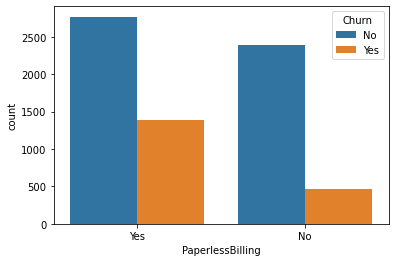

In [86]:
#plotting count plot
sns.countplot(x='PaperlessBilling',hue='Churn',data=data)
plt.show()

**In this plot we can see that customers who are getting paperless billing have stayed the most and who are not getting paperless billing have left the least.**

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


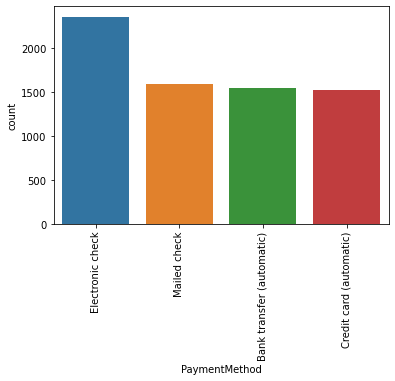

In [87]:
#plotting count plot
sns.countplot(x='PaymentMethod',data=data)
print(data['PaymentMethod'].value_counts())
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that around 2359 customers are doing payments by electronic check,while 1596 customers are doing payments by mailed check,around 1544 customers are doing payments by Bank transfer (automatic) and 1522 customers are doing payments by Credit card (automatic).**

No     5164
Yes    1857
Name: Churn, dtype: int64


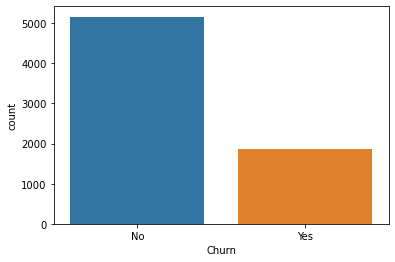

In [88]:
#plotting count plot
sns.countplot(x='Churn',data=data)
print(data['Churn'].value_counts())
plt.show()

**In this plot we can see that around 5164 customers are not leaving the company or a service provider and around 1857 customers have left the company or service provider.**

# checking how many males who are with the same company and checking there information with the other columns

In [89]:
#checking how many males who are with the same company
male1=data[data['gender']=='Male'][data['Churn']=='No']

Male    2618
Name: gender, dtype: int64


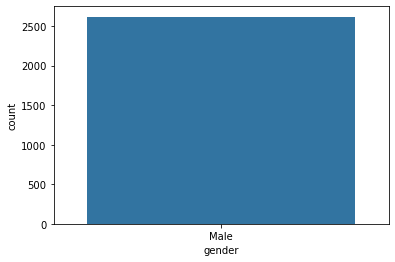

In [90]:
#plotting count plot
sns.countplot(x='gender',data=male1)
print(male1['gender'].value_counts())
plt.show()

**In this plot we can see the number of males which have stayed with the same company or service provider, that is around 2618 males have stayed.**

0    2280
1     338
Name: SeniorCitizen, dtype: int64


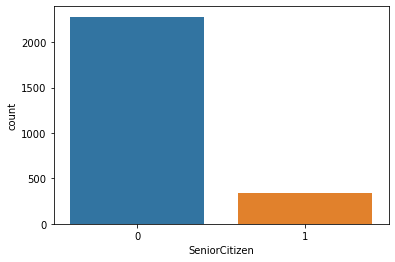

In [91]:
#plotting count plot
sns.countplot(x='SeniorCitizen',data=male1)
print(male1['SeniorCitizen'].value_counts())
plt.show()

**Among the males who have stayed 2280 are non senior citizens and 338 are senior citizens.**

DSL            993
Fiber optic    910
No             715
Name: InternetService, dtype: int64


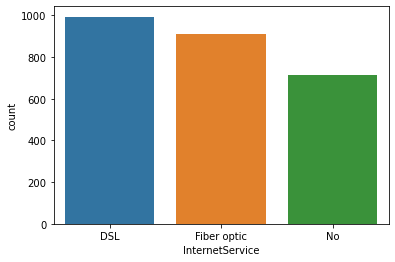

In [92]:
#plotting count plot
sns.countplot(x='InternetService',data=male1)
print(male1['InternetService'].value_counts())
plt.show()

**Among the males who have stayed 993 are using dsl,910 are using fibre optic and 715 they dint use internet service.**

Yes    2357
No      261
Name: PhoneService, dtype: int64


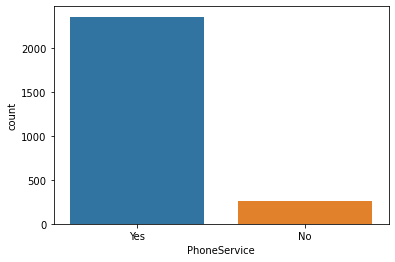

In [93]:
#plotting count plot
sns.countplot(x='PhoneService',data=male1)
print(male1['PhoneService'].value_counts())
plt.show()

**Among the males who have stayed most if them were using phone service.**

No                  1306
Yes                 1051
No phone service     261
Name: MultipleLines, dtype: int64


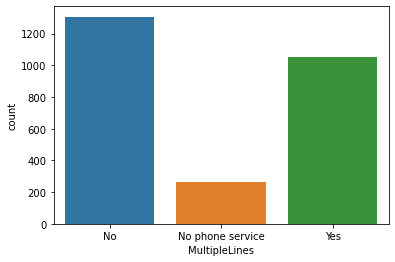

In [94]:
#plotting count plot
sns.countplot(x='MultipleLines',data=male1)
print(male1['MultipleLines'].value_counts())
plt.show()

**Among the males wh0 have stayed most of them were not having multiplelines.**

No                     1044
Yes                     859
No internet service     715
Name: OnlineSecurity, dtype: int64


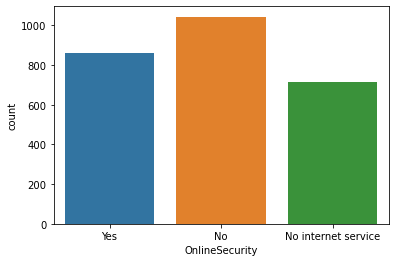

In [95]:
#plotting count plot
sns.countplot(x='OnlineSecurity',data=male1)
print(male1['OnlineSecurity'].value_counts())
plt.show()

**Among the males who have stayed  most of them were not having online security.**

No                     958
Yes                    945
No internet service    715
Name: OnlineBackup, dtype: int64


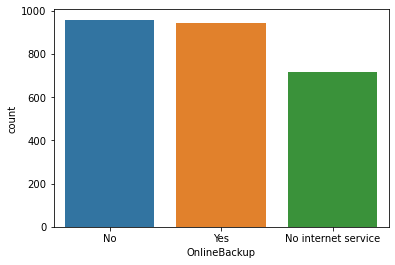

In [96]:
#plotting count plot
sns.countplot(x='OnlineBackup',data=male1)
print(male1['OnlineBackup'].value_counts())
plt.show()

**Among the males who have stayed  most of them were not having online backup.**

No                     962
Yes                    941
No internet service    715
Name: DeviceProtection, dtype: int64


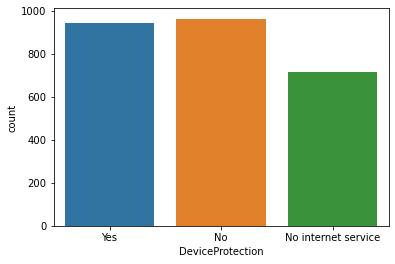

In [97]:
#plotting count plot
sns.countplot(x='DeviceProtection',data=male1)
print(male1['DeviceProtection'].value_counts())
plt.show()

**Among the males who have stayed  most of them were having Device protection.**

No                     1031
Yes                     872
No internet service     715
Name: TechSupport, dtype: int64


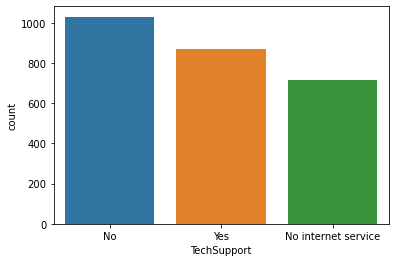

In [98]:
#plotting count plot
sns.countplot(x='TechSupport',data=male1)
print(male1['TechSupport'].value_counts())
plt.show()

**Among the males who have stayed  most of them were not having tech support.**

No                     963
Yes                    940
No internet service    715
Name: StreamingTV, dtype: int64


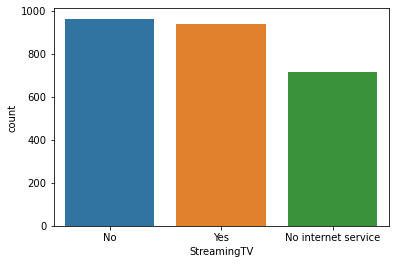

In [99]:
#plotting count plot
sns.countplot(x='StreamingTV',data=male1)
print(male1['StreamingTV'].value_counts())
plt.show()

**Among the males who have stayed  most of them were not having streaming tv.**

No                     953
Yes                    950
No internet service    715
Name: StreamingMovies, dtype: int64


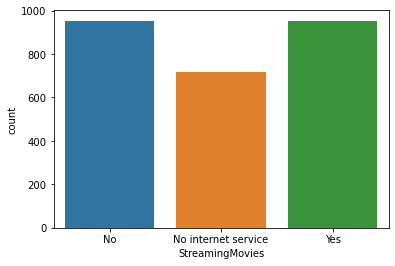

In [100]:
#plotting count plot
sns.countplot(x='StreamingMovies',data=male1)
print(male1['StreamingMovies'].value_counts())
plt.show()

**Among the males who have stayed  most of them were not having streaming movies.**

Yes    1383
No     1235
Name: PaperlessBilling, dtype: int64


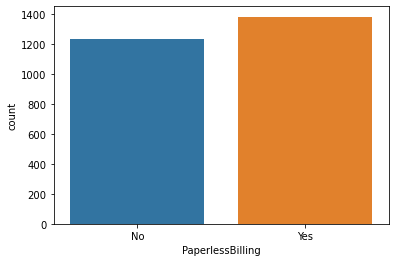

In [101]:
#plotting count plot
sns.countplot(x='PaperlessBilling',data=male1)
print(male1['PaperlessBilling'].value_counts())
plt.show()

**Among the males who have stayed  most of them were getting paperless billing.**

# checking how many males who have left company and checking there information with the other columns

In [102]:
#checking how many males who have left the company
male2=data[data['gender']=='Male'][data['Churn']=='Yes']

Male    923
Name: gender, dtype: int64


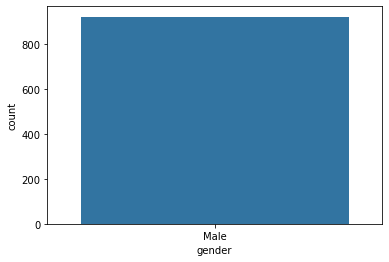

In [103]:
#plotting count plot
sns.countplot(x='gender',data=male2)
print(male2['gender'].value_counts())
plt.show()

**In this plot we can see the numbere of males which have left the company or service provider.that is around 932 males have left the company or the service provider**

0    687
1    236
Name: SeniorCitizen, dtype: int64


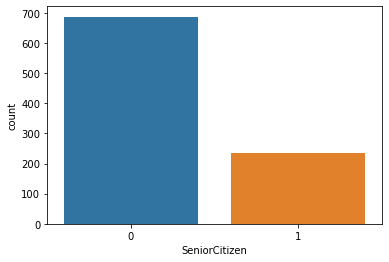

In [104]:
#plotting count plot
sns.countplot(x='SeniorCitizen',data=male2)
print(male2['SeniorCitizen'].value_counts())
plt.show()

**Among the males who left  most of them were non senior citizen.**

# checking how many Females who are with the same company and checking there information with the other columns

In [105]:
#checking how many females who are with the same company
female1=data[data['gender']=='Female'][data['Churn']=='No']

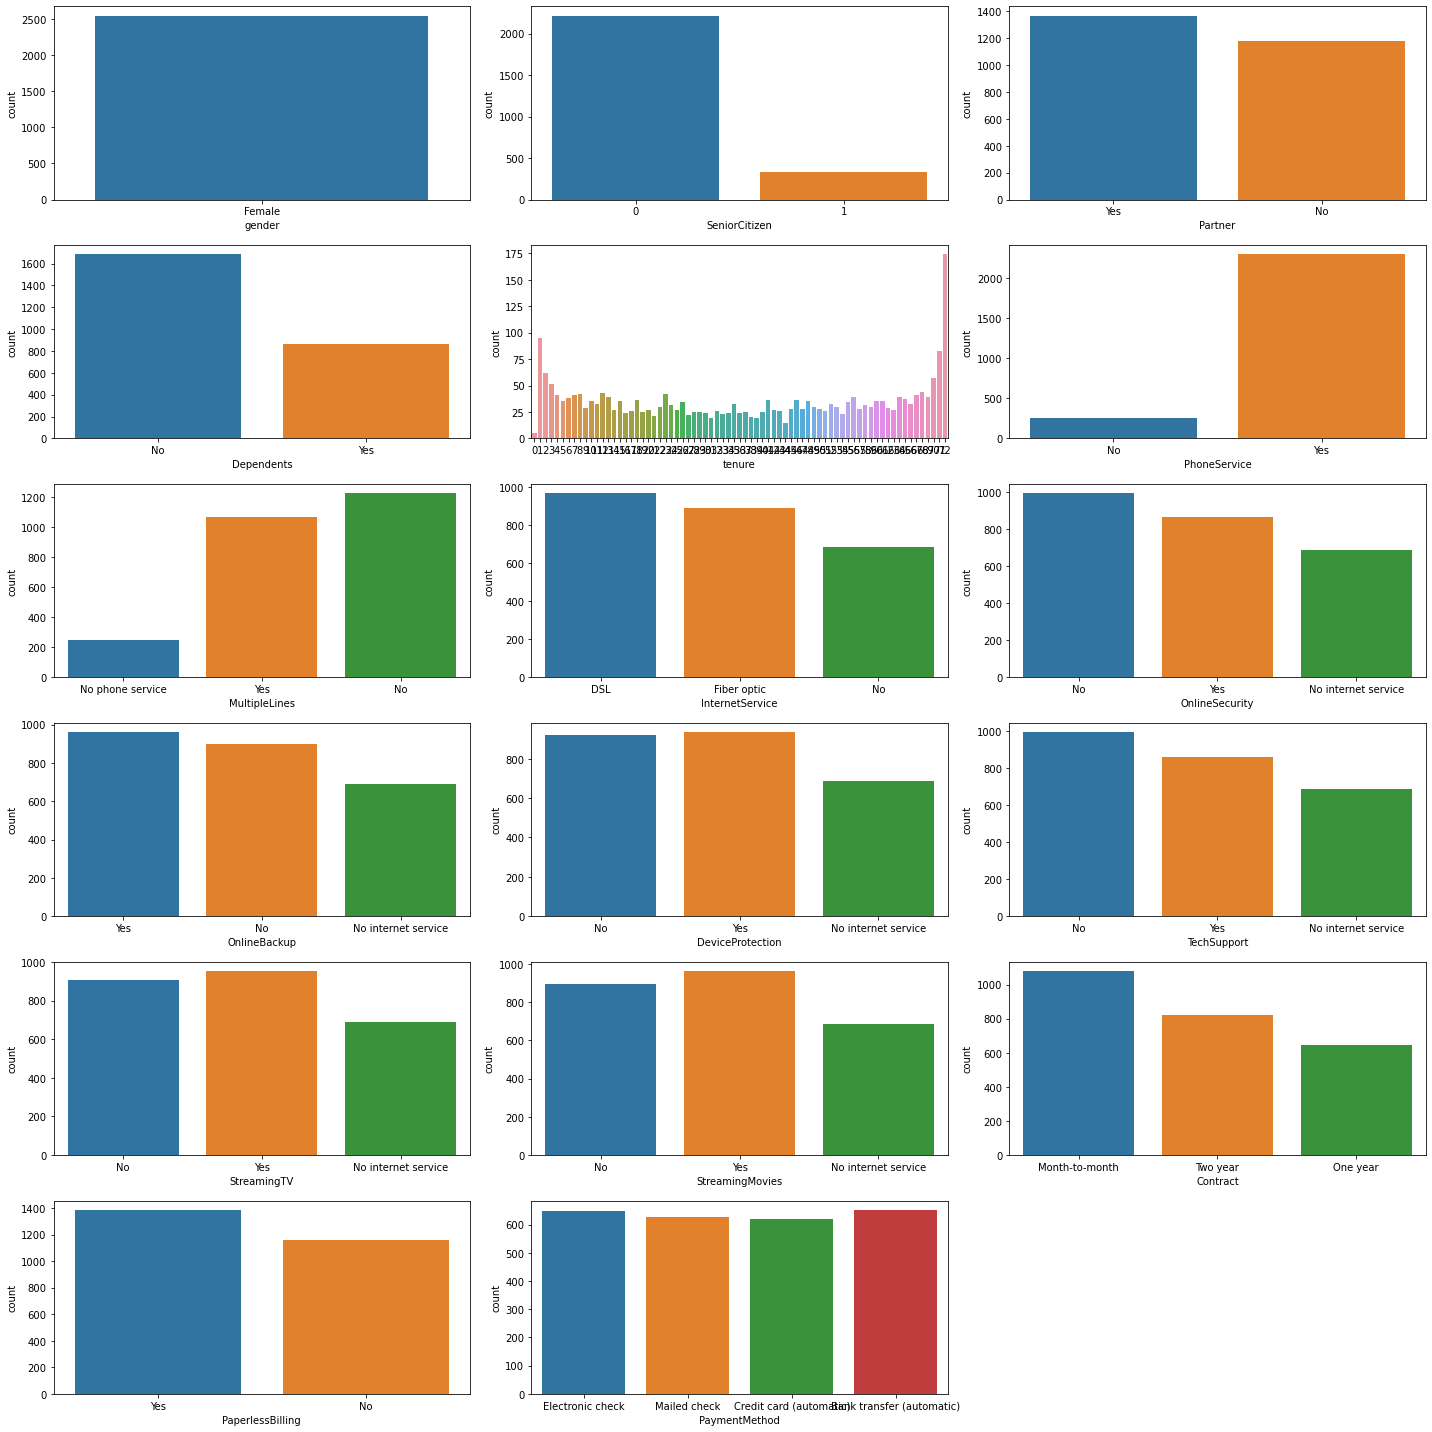

In [106]:
#plotting count plots
plt.figure(figsize=(20,20))
plotnumber=1
for i in female1:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(female1[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [107]:
#checking the values counts for the above plots
for i in female1:
    print(female1[i].value_counts())

Female    2546
Name: gender, dtype: int64
0    2218
1     328
Name: SeniorCitizen, dtype: int64
Yes    1369
No     1177
Name: Partner, dtype: int64
No     1683
Yes     863
Name: Dependents, dtype: int64
72    174
1      95
71     83
2      62
70     57
     ... 
38     20
31     19
39     19
44     15
0       5
Name: tenure, Length: 73, dtype: int64
Yes    2295
No      251
Name: PhoneService, dtype: int64
No                  1225
Yes                 1070
No phone service     251
Name: MultipleLines, dtype: int64
DSL            969
Fiber optic    889
No             688
Name: InternetService, dtype: int64
No                     993
Yes                    865
No internet service    688
Name: OnlineSecurity, dtype: int64
Yes                    961
No                     897
No internet service    688
Name: OnlineBackup, dtype: int64
Yes                    936
No                     922
No internet service    688
Name: DeviceProtection, dtype: int64
No                     996
Yes           

**Observation**
* **After going through the above plots and values counts, the numnber of females who stayed were around 2546 in numbers.**
* **Among them 328 were senior sitizens.**
* **Most of them were having partner.**
* **Most of them were noit using multiple lines.**
* **Most of them were having month to month cntract.**
* **Most of them were using Dsl,they were having online backup,online security,streaming tv and streaming movies.**

# checking how many Females who have left the company and checking there information with the other columns

In [108]:
#checking how many females who are with the same company
female2=data[data['gender']=='Female'][data['Churn']=='Yes']

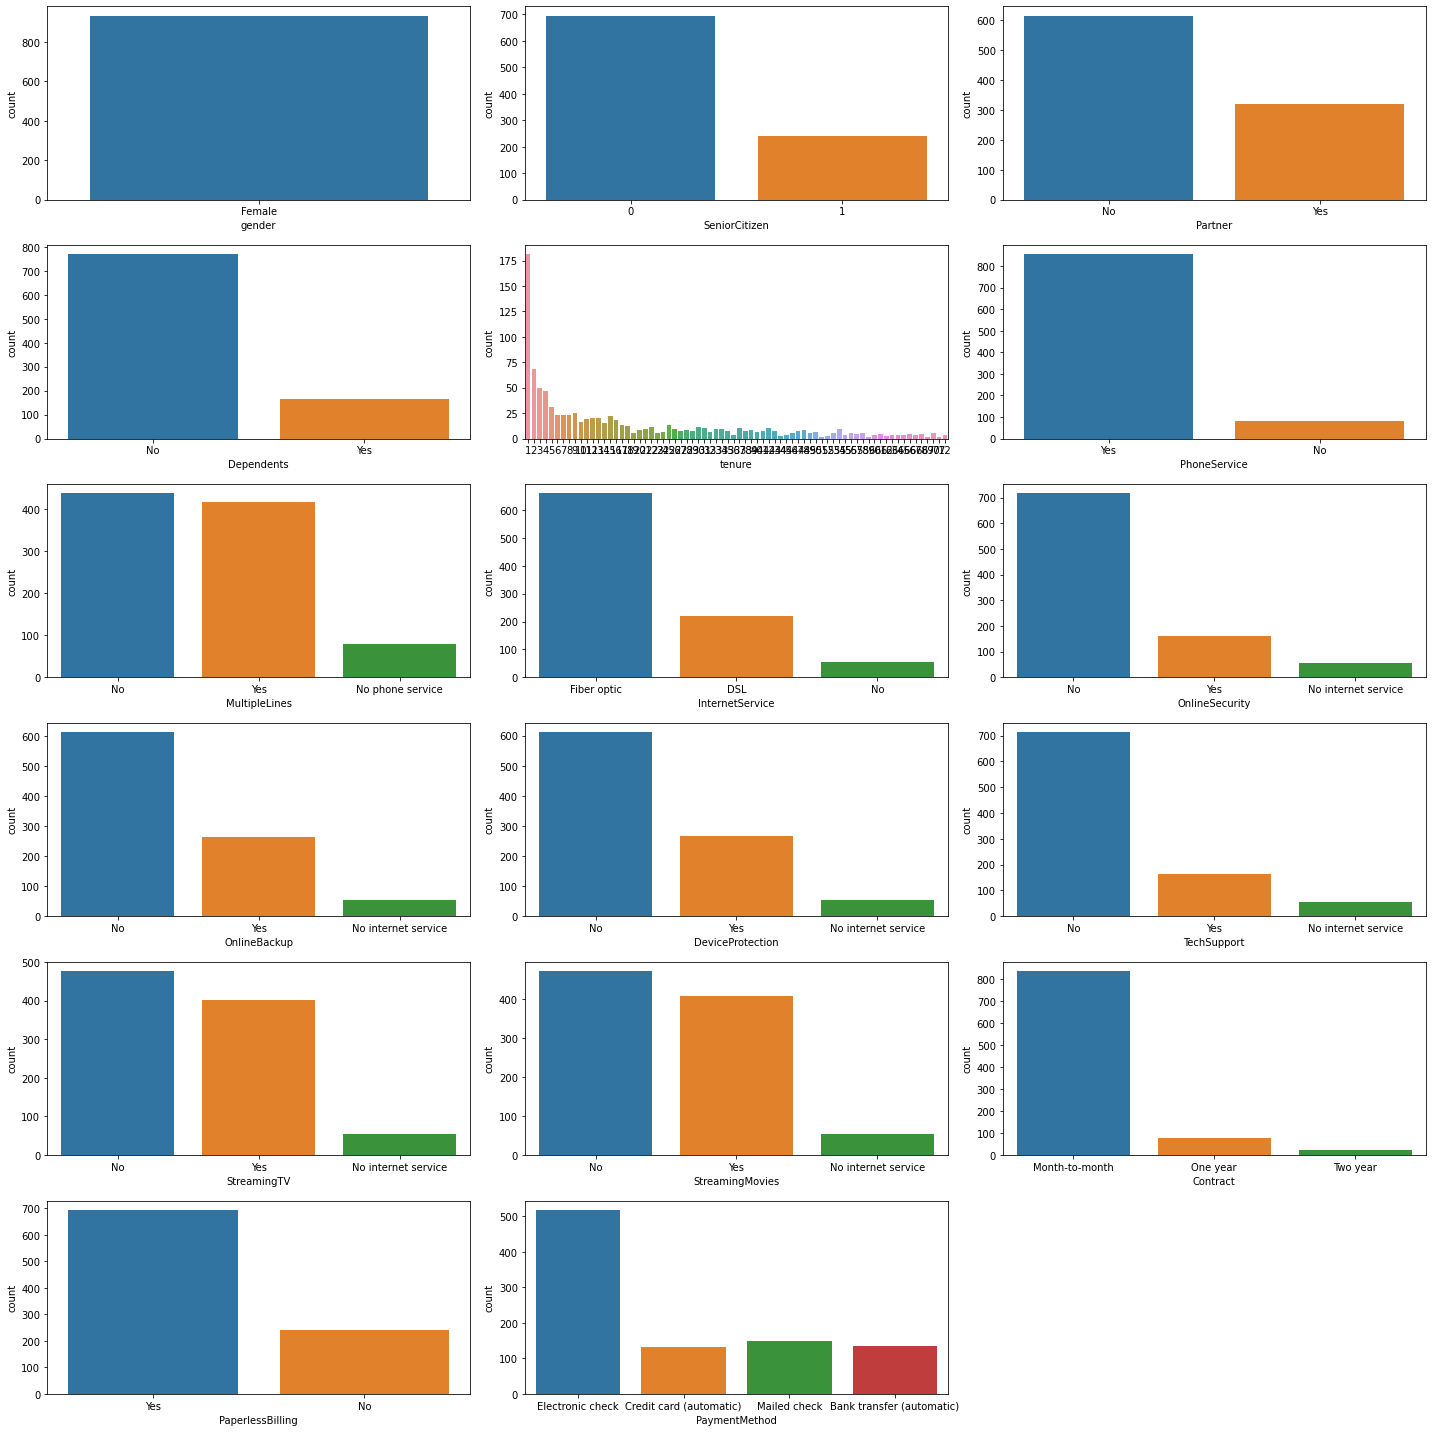

In [109]:
#plotting count plots
plt.figure(figsize=(20,20))
plotnumber=1
for i in female2:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(female2[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [110]:
#checking the values counts for the above plots
for i in female1:
    print(female2[i].value_counts())

Female    934
Name: gender, dtype: int64
0    695
1    239
Name: SeniorCitizen, dtype: int64
No     615
Yes    319
Name: Partner, dtype: int64
No     769
Yes    165
Name: Dependents, dtype: int64
1     181
2      68
3      50
4      47
5      31
     ... 
62      2
69      1
59      1
71      1
51      1
Name: tenure, Length: 72, dtype: int64
Yes    854
No      80
Name: PhoneService, dtype: int64
No                  438
Yes                 416
No phone service     80
Name: MultipleLines, dtype: int64
Fiber optic    660
DSL            219
No              55
Name: InternetService, dtype: int64
No                     717
Yes                    162
No internet service     55
Name: OnlineSecurity, dtype: int64
No                     614
Yes                    265
No internet service     55
Name: OnlineBackup, dtype: int64
No                     612
Yes                    267
No internet service     55
Name: DeviceProtection, dtype: int64
No                     714
Yes                    165

**Observation**
* **By going through the above the plots and value counts, i can say that, the number of females who left were around 934, among them 239 were senior citizens.**
* **Most of them were using fibre optic.**
* **Most of them were not having this facilities such as online security,tech support,online backup,device protection,streaming tv and streaming movies.**


In [111]:
#checking how many customers who stayed while using DSL
dsl=data[data['InternetService']=='DSL'][data['Churn']=='No']

In [112]:
#checking how many customers who left while using DSL
dsl1=data[data['InternetService']=='DSL'][data['Churn']=='Yes']

In [113]:
dsl['gender'].value_counts()

Male      993
Female    969
Name: gender, dtype: int64

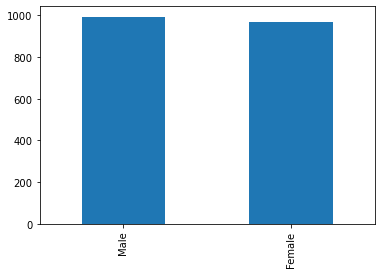

In [114]:
dsl['gender'].value_counts().plot.bar()
plt.show()

**So we can see that customers who were using DSL among them 993 males and 969 females have stayed.**

In [115]:
dsl1['gender'].value_counts()

Male      238
Female    219
Name: gender, dtype: int64

**So we can see that customers who were using DSL among them 238 males and 219 females have left.**

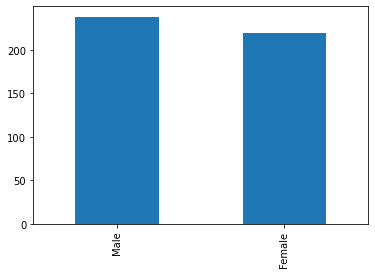

In [116]:
dsl1['gender'].value_counts().plot.bar()
plt.show()

In [117]:
#checking how many customers who stayed while using Fiber_optic
Fiber_optic=data[data['InternetService']=='Fiber optic'][data['Churn']=='No']

In [118]:
#checking how many customers who left while using Fiber_optic
Fiber_optic1=data[data['InternetService']=='Fiber optic'][data['Churn']=='Yes']

In [119]:
Fiber_optic['gender'].value_counts()

Male      910
Female    889
Name: gender, dtype: int64

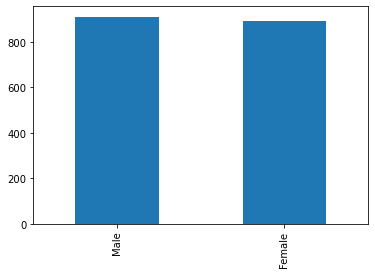

In [120]:
Fiber_optic['gender'].value_counts().plot.bar()
plt.show()

**So we can see that customers who were using Fiber_optic among them 910 males and 889 females have stayed.**

In [121]:
Fiber_optic1['gender'].value_counts()

Female    660
Male      631
Name: gender, dtype: int64

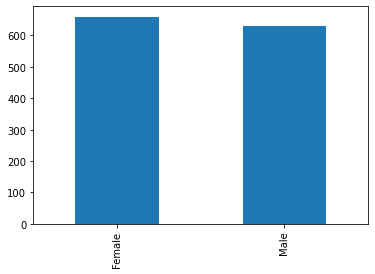

In [122]:
Fiber_optic1['gender'].value_counts().plot.bar()
plt.show()

**So we can see that customers who were using Fiber_optic among them 631 males and 660 females have left.**

In [123]:
top_10=data.sort_values(by='MonthlyCharges',ascending=False)[:10]
top_10

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
4804,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
3894,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5127,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
6118,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
3205,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No
6768,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4875,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes


**So we can see the highest monthly charges in which we can see that customer who are using fibre optic are having highest monthly charges.**

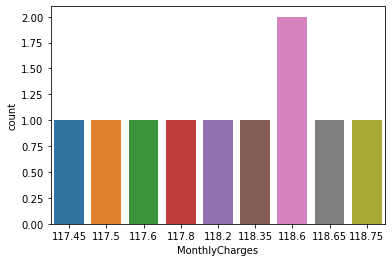

In [124]:
#Plotting countplot 
sns.countplot(x='MonthlyCharges',data=top_10)
plt.show()

**In this plot we can see the 10 highest monthly charges.**

In [125]:
top_10_1=data.sort_values(by='TotalCharges',ascending=False)[:10]
top_10_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
6118,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
5558,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
2368,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2603,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No
2025,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No


**So we can see the highest total charges in which we can see that customer who are using fibre optic are having highest total charges.**

In [126]:
data.sort_values(by='MonthlyCharges',ascending=False)[:150][data['Churn']=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5127,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4875,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes
6289,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),116.20,7752.30,Yes
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
1306,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
1077,Female,0,No,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),114.50,4527.45,Yes
6038,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.20,7723.90,Yes
1673,Female,0,Yes,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),113.60,4594.95,Yes
1770,Female,1,No,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,113.20,4689.50,Yes


**In this we can see that highest monthly charges  where customer are leaving the company, so in this we can see the internet service used is Fabric optic.**

In [127]:
data.sort_values(by='TotalCharges',ascending=False)[:500][data['Churn']=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
1306,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
3890,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
5581,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00,Yes
5127,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
6289,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),116.20,7752.30,Yes
6038,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.20,7723.90,Yes
6398,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),106.00,7723.70,Yes
3040,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.90,Yes


**In this we can see that highest total charges  where customer are leaving the company, so in this we can see the internet service used is Fabric optic.**

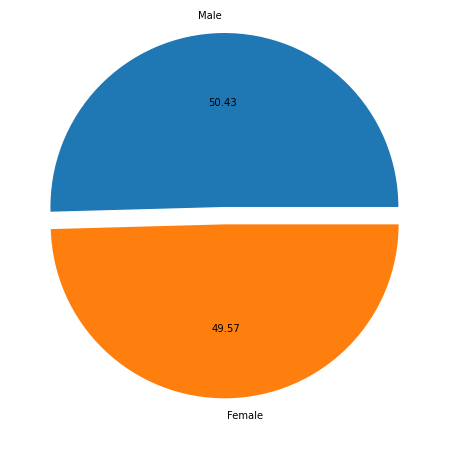

In [128]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Male','Female'
plt.pie(x=data['gender'].value_counts(),explode=[0.1,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see the percentage of male is more than the female.**

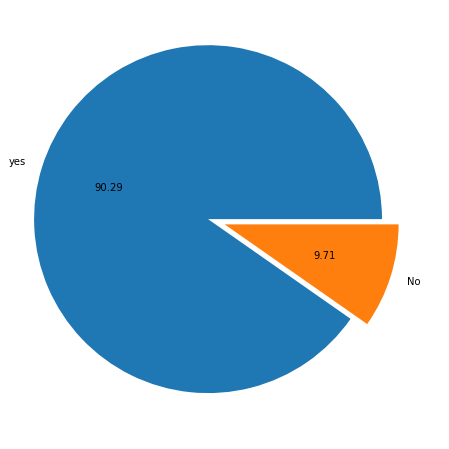

In [129]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='yes','No'
plt.pie(x=data['PhoneService'].value_counts(),explode=[0.1,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can most of the customers are using phone service.**

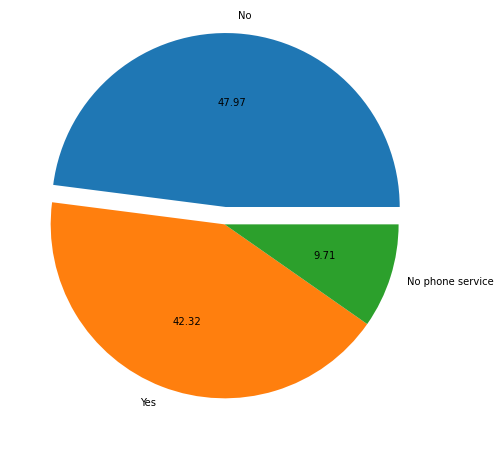

In [130]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No phone service'
plt.pie(x=data['MultipleLines'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers were not having multiple lines.**

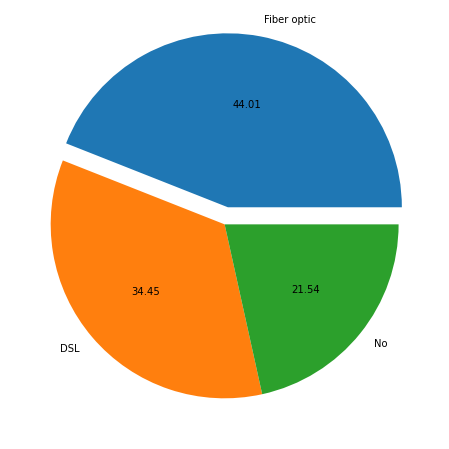

In [131]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Fiber optic','DSL','No'
plt.pie(x=data['InternetService'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers are using fibre optic followed by DSL.**

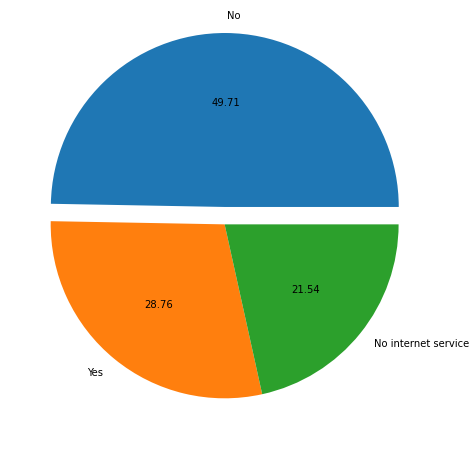

In [132]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['OnlineSecurity'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have online security.**

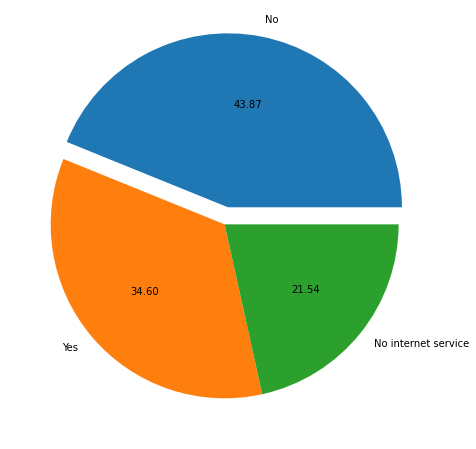

In [133]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['OnlineBackup'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have online backup.**

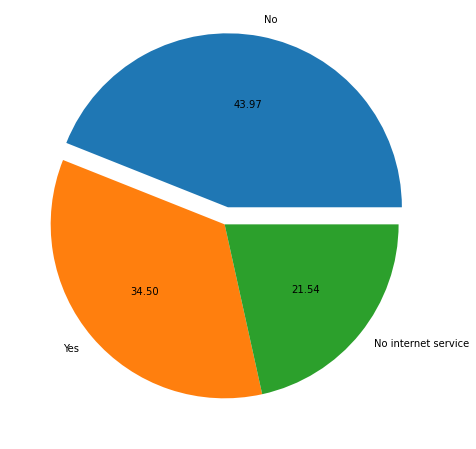

In [134]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['DeviceProtection'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have device protection.**

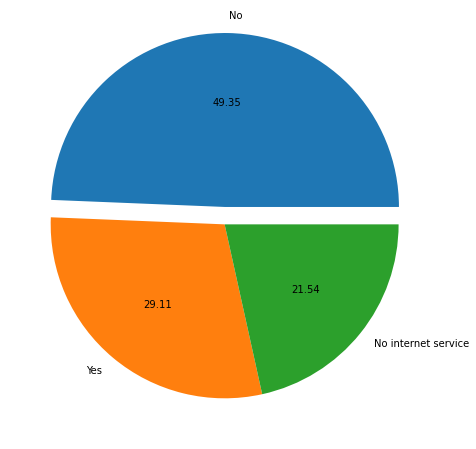

In [135]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['TechSupport'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have tech support.**

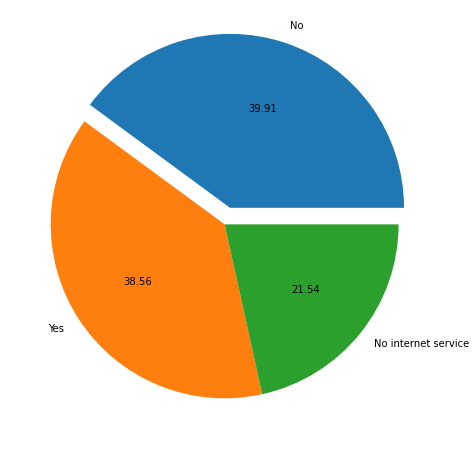

In [136]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['StreamingTV'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have streaming tv.**

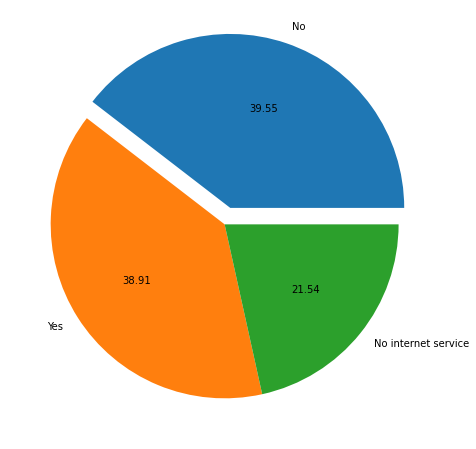

In [137]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes','No internet service'
plt.pie(x=data['StreamingMovies'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers who are using internet service does not have streaming movies.**

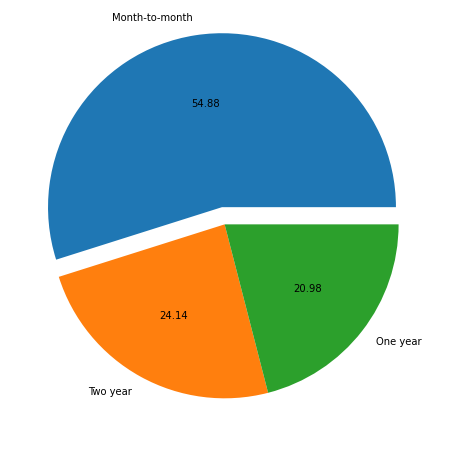

In [138]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Month-to-month','Two year','One year'
plt.pie(x=data['Contract'].value_counts(),explode=[0.1,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers opt for month to month contract.**

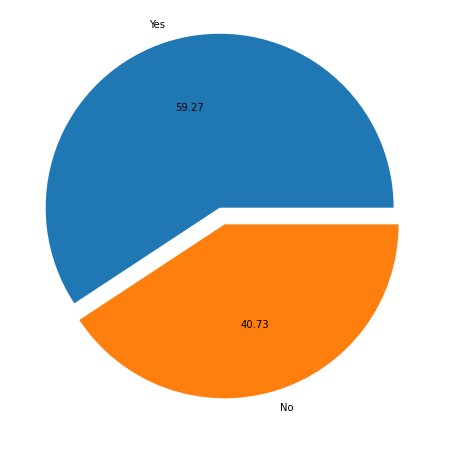

In [139]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Yes','No'
plt.pie(x=data['PaperlessBilling'].value_counts(),explode=[0.1,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers get paperless bills.**

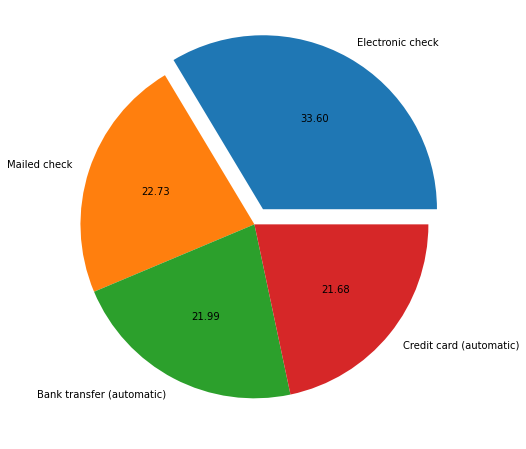

In [140]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
plt.pie(x=data['PaymentMethod'].value_counts(),explode=[0.1,0,0,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers does payment through electronic check followed by mailed check,bank transfer and credit card.**

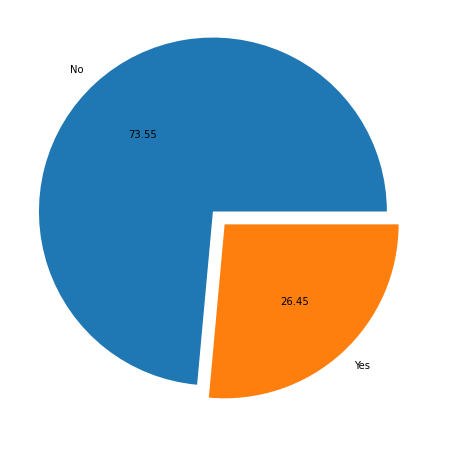

In [141]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='No','Yes'
plt.pie(x=data['Churn'].value_counts(),explode=[0.1,0],labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the customers have not opt to change the companies.**

In [142]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [143]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['gender'])
df2=lab_enc.fit_transform(data['Partner'])
df3=lab_enc.fit_transform(data['Dependents'])
df4=lab_enc.fit_transform(data['PhoneService'])
df5=lab_enc.fit_transform(data['MultipleLines'])
df6=lab_enc.fit_transform(data['InternetService'])
df7=lab_enc.fit_transform(data['OnlineSecurity'])
df8=lab_enc.fit_transform(data['OnlineBackup'])
df9=lab_enc.fit_transform(data['DeviceProtection'])
df10=lab_enc.fit_transform(data['TechSupport'])
df11=lab_enc.fit_transform(data['StreamingTV'])
df12=lab_enc.fit_transform(data['StreamingMovies'])
df13=lab_enc.fit_transform(data['PaperlessBilling'])
df14=lab_enc.fit_transform(data['PaymentMethod'])
df15=lab_enc.fit_transform(data['Churn'])
df16=lab_enc.fit_transform(data['Contract'])

In [144]:
#Transfering the data 
data['gender']=df1
data['Partner']=df2
data['Dependents']=df3
data['PhoneService']=df4
data['MultipleLines']=df5
data['InternetService']=df6
data['OnlineSecurity']=df7
data['OnlineBackup']=df8
data['DeviceProtection']=df9
data['TechSupport']=df10
data['StreamingTV']=df11
data['StreamingMovies']=df12
data['PaperlessBilling']=df13
data['PaymentMethod']=df14
data['Churn']=df15
data['Contract']=df16

In [145]:
#Checking whether the data is encoded or not
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**So we can see that categorical columns have been encoded.**

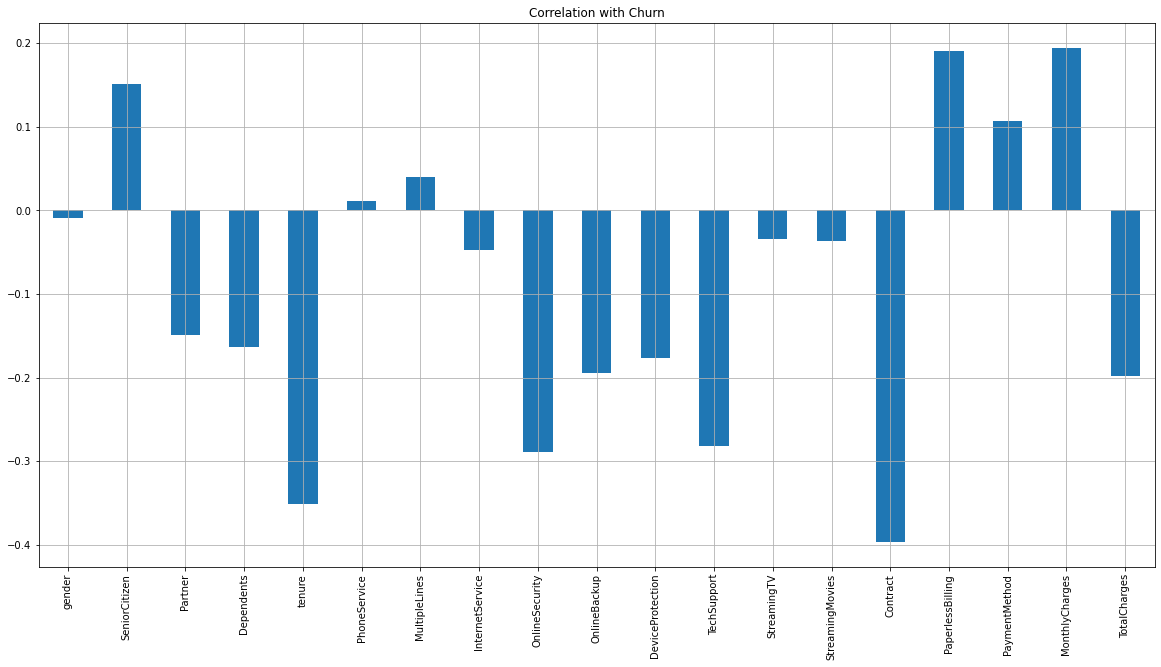

In [146]:
#Checking for correlation
data.drop(['Churn'],axis=1).corrwith(data['Churn']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Churn')
plt.show()

**In this plot we can see that contract and tenure are highly correlated with the label and column gender and phone service are very least correlated with the label.**

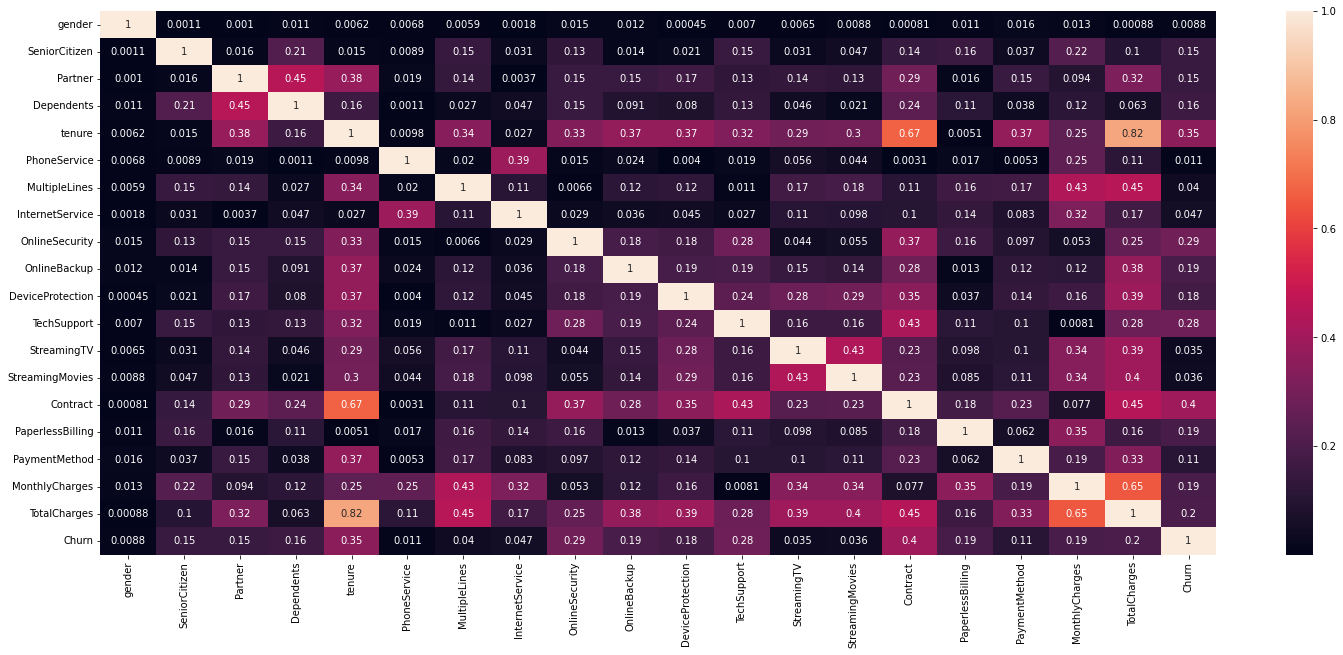

In [147]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this i can see that tenure is multicorrelated with total charges.**
* **So further i will plot scatter plot and will check the relationship.**

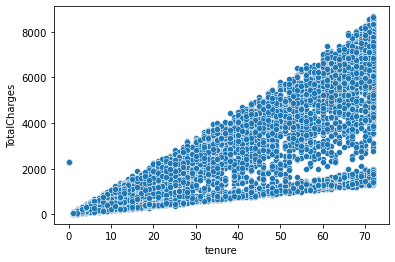

In [148]:
#plotting scatter plot
sns.scatterplot(x='tenure',y='TotalCharges',data=data)
plt.show()

**In this plot i can see a positive relationship, so i will cross verify it bby using vif method.**

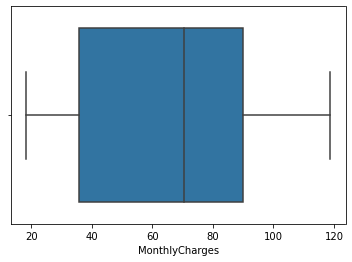

In [149]:
#checking outliers
sns.boxplot(x='MonthlyCharges',data=data)
plt.show()

**In this plot outliers are not present.**

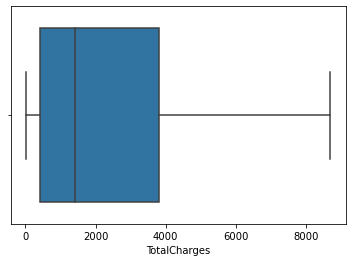

In [150]:
#checking outliers
sns.boxplot(x='TotalCharges',data=data)
plt.show()

**In this plot outliers are not present.**

In [151]:
#checking skewness for continuous columns
data.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959088
Churn               1.068139
dtype: float64

**In column total charges i can see skewness is present.rest all the columns in which values is more than 0.5 or -0.5 than they are categorical columns and we dont treat skewness for categorical columns.**

In [152]:
#Importing required libraries
from sklearn.preprocessing import power_transform

**Treating skewness using power transform method**

In [153]:
#using power transform method
data[['TotalCharges']]=power_transform(data[['TotalCharges']],method='yeo-johnson')
data[['TotalCharges']]

,TotalCharges
0,-1.821579
1,0.248197
2,-1.397518
3,0.227054
4,-1.260061
...,...
7038,0.290738
7039,1.567717
7040,-0.868826
7041,-0.932072


In [154]:
#checking skewness for continuous columns
data.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.143822
Churn               1.068139
dtype: float64

**So we can see that skewness have been removed.**

In [155]:
#Dividing dataset into features and label
#Features
x=data.drop(['Churn'],axis=1)
#Label
y=data['Churn']

In [156]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.16413536, -1.82157888],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.26281076,  0.24819658],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.36591432, -1.39751816],
       ...,
       [-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.17245016, -0.8688257 ],
       [ 0.9913492 ,  2.27010445,  1.03140002, ...,  1.33896466,
         0.31756245, -0.93207197],
       [ 0.9913492 , -0.44050836, -0.96955592, ..., -1.47146012,
         1.35691277,  1.48467182]])

In [157]:
x_scaler.shape

(7021, 19)

In [158]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.001693,gender
1,1.149525,SeniorCitizen
2,1.459014,Partner
3,1.383384,Dependents
4,10.689754,tenure
5,1.623008,PhoneService
6,1.394072,MultipleLines
7,1.860413,InternetService
8,1.252436,OnlineSecurity
9,1.188371,OnlineBackup


**so we can see that total charges and tenure have multicollinearity problem so dropping column total charges because it is less related to the label than tenure**

In [160]:
x=data.drop(['TotalCharges','Churn'],axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [161]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.00872629, -0.44050836,  1.03140002, ...,  0.82905656,
         0.4021564 , -1.16413536],
       [ 0.9913492 , -0.44050836, -0.96955592, ..., -1.20619033,
         1.33896466, -0.26281076],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  0.82905656,
         1.33896466, -0.36591432],
       ...,
       [-1.00872629, -0.44050836,  1.03140002, ...,  0.82905656,
         0.4021564 , -1.17245016],
       [ 0.9913492 ,  2.27010445,  1.03140002, ...,  0.82905656,
         1.33896466,  0.31756245],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  0.82905656,
        -1.47146012,  1.35691277]])

**Using feature selection method.**

In [162]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [163]:
best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(16,'Score'))

        Feature_Name        Score
14          Contract  1309.552886
4             tenure   989.515082
8     OnlineSecurity   637.269769
11       TechSupport   604.784966
17    MonthlyCharges   275.993382
9       OnlineBackup   275.128573
15  PaperlessBilling   265.441296
10  DeviceProtection   226.402747
3         Dependents   192.687978
1      SeniorCitizen   165.150554
2            Partner   159.662083
16     PaymentMethod    80.124746
7    InternetService    15.782874
6      MultipleLines    11.347148
13   StreamingMovies     9.359535
12       StreamingTV     8.408374


In [164]:
new_feature=data[['Contract','tenure','OnlineSecurity','TechSupport','MonthlyCharges','OnlineBackup','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen','Partner','PaymentMethod','InternetService','MultipleLines','StreamingMovies','StreamingTV']]
new_feature

,Contract,tenure,OnlineSecurity,TechSupport,MonthlyCharges,OnlineBackup,PaperlessBilling,DeviceProtection,Dependents,SeniorCitizen,Partner,PaymentMethod,InternetService,MultipleLines,StreamingMovies,StreamingTV
0,0,1,0,0,29.85,2,1,0,0,0,1,2,0,1,0,0
1,1,34,2,0,56.95,0,0,2,0,0,0,3,0,0,0,0
2,0,2,2,0,53.85,2,1,0,0,0,0,3,0,0,0,0
3,1,45,2,2,42.30,0,0,2,0,0,0,0,0,1,0,0
4,0,2,0,0,70.70,0,1,0,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,2,84.80,0,1,2,1,0,1,3,0,2,2,2
7039,1,72,0,0,103.20,2,1,2,1,0,1,1,1,2,2,2
7040,0,11,2,0,29.60,0,1,0,1,0,1,2,0,1,0,0
7041,0,4,0,0,74.40,0,1,0,0,1,1,3,1,2,0,0


In [165]:
#checking whether label is balanced or not
data['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

**SO we can see that the data is imbalanced. so using smote technique to balance the data.**

In [166]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [167]:
over_samp=SMOTE(0.75)

In [168]:
x_new,y_new=over_samp.fit_resample(new_feature,y)

In [169]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 0    5164
1    1857
Name: Churn, dtype: int64


In [170]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    5164
1    3873
Name: Churn, dtype: int64


**So now we can see that data is balanced.**

In [171]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

**Random Forest Classifier**

In [172]:
#instantiating the model
rfc=RandomForestClassifier()

In [173]:
#using range fucntion to find the best random state using Random Forest Classifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_train)
    y_pred=rfc.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:99.74915154198023
at random state0,the testing accuracy is:82.52212389380531


at random state1,the training accuracy is:99.74915154198023
at random state1,the testing accuracy is:82.47787610619469


at random state2,the training accuracy is:99.82293050022135
at random state2,the testing accuracy is:82.0353982300885


at random state3,the training accuracy is:99.77866312527667
at random state3,the testing accuracy is:82.65486725663716


at random state4,the training accuracy is:99.80817470857312
at random state4,the testing accuracy is:83.27433628318585


at random state5,the training accuracy is:99.79341891692489
at random state5,the testing accuracy is:82.30088495575221


at random state6,the training accuracy is:99.77866312527667
at random state6,the testing accuracy is:83.31858407079646


at random state7,the training accuracy is:99.77866312527667
at random state7,the testing accuracy is:81.19469026548673


at random state8,the training acc

**Taking random state as 25.**

In [174]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=25)

In [175]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [176]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [177]:
#calling the function and passing the dataset for logistic regression
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:99.76%

=====Test Score=====
Accuracy Score:83.63%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1292
           1       0.81      0.80      0.81       968

    accuracy                           0.84      2260
   macro avg       0.83      0.83      0.83      2260
weighted avg       0.84      0.84      0.84      2260


 Confusion Matrix:
 [[1113  179]
 [ 191  777]]

 F1 Score:
 0.8362831858407079


In [178]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [179]:
y_pred=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [180]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(rfc,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.7938517376977301and accuracy for the testing is 0.8362831858407079


at cross fold 3 the cv score is0.8157634608889001and accuracy for the testing is 0.8362831858407079


at cross fold 4 the cv score is0.8170899979237425and accuracy for the testing is 0.8362831858407079


at cross fold 5 the cv score is0.822520152700168and accuracy for the testing is 0.8362831858407079




**Taking cv=5.**

In [181]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [182]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.13854489 1.        ]
TPR [0.         0.80268595 1.        ]
Threshold [2 1 0]


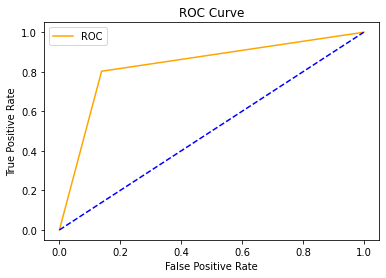

In [183]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support vector Machine**

In [184]:
#instantiatiating the model
svm=SVC()

In [185]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=25)

In [186]:
#Training the data
svm.fit(x_train,y_train)

SVC()

In [187]:
#calling the function and passing the dataset for gradient boosting
metric_score(svm,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(svm,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:76.17%

=====Test Score=====
Accuracy Score:76.50%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1292
           1       0.73      0.72      0.73       968

    accuracy                           0.77      2260
   macro avg       0.76      0.76      0.76      2260
weighted avg       0.76      0.77      0.76      2260


 Confusion Matrix:
 [[1028  264]
 [ 267  701]]

 F1 Score:
 0.7650442477876105


In [188]:
#Checking cross validation score
cv_score=cross_val_score(svm,x_new,y_new,cv=5).mean()
cv_score

0.7634202780729806

In [189]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [190]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.13854489 1.        ]
TPR [0.         0.80268595 1.        ]
Threshold [2 1 0]


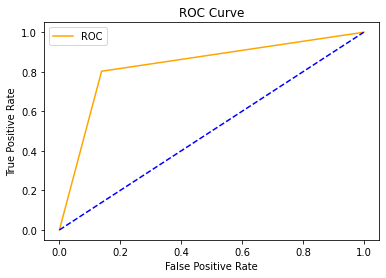

In [191]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [192]:
#Initiating Ada boost classifier
ada=AdaBoostClassifier()

In [193]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=25)

In [194]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [195]:
#calling the function and passing the dataset for ada boost
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:79.80%

=====Test Score=====
Accuracy Score:80.88%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1292
           1       0.77      0.79      0.78       968

    accuracy                           0.81      2260
   macro avg       0.80      0.81      0.81      2260
weighted avg       0.81      0.81      0.81      2260


 Confusion Matrix:
 [[1060  232]
 [ 200  768]]

 F1 Score:
 0.8088495575221238


In [196]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=5).mean()
cv_score

0.7899824184219677

In [197]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [198]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.13854489 1.        ]
TPR [0.         0.80268595 1.        ]
Threshold [2 1 0]


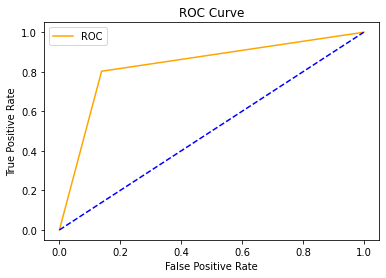

In [199]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**DECISIONTREE CLASSIFIER**

In [200]:
#Instantiating the models
dt=DecisionTreeClassifier()

In [201]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=25)

In [202]:
#Training the data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [203]:
#calling the function and passing the dataset for logistic regression
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:99.76%

=====Test Score=====
Accuracy Score:79.12%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1292
           1       0.74      0.78      0.76       968

    accuracy                           0.79      2260
   macro avg       0.79      0.79      0.79      2260
weighted avg       0.79      0.79      0.79      2260


 Confusion Matrix:
 [[1033  259]
 [ 213  755]]

 F1 Score:
 0.7911504424778761


In [204]:
#Checking cross validation score
cv_score=cross_val_score(dt,x_new,y_new,cv=5).mean()
cv_score

0.7754879622510297

In [205]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [206]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.13854489 1.        ]
TPR [0.         0.80268595 1.        ]
Threshold [2 1 0]


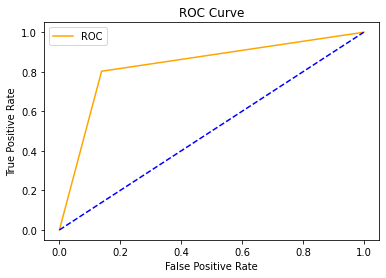

In [207]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [218]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Random Forest','SVM','Ada Boost','Decision Tree'],
    'Training Score':[99.76,76.17,79.80,99.76],
    'Testing Score':[83.63,76.50,80.88,79.12],
    'Cross Val Score':[82.25,76.34,78.99,77.54],
    'F1 score':[83.62,76.50,80.58,79.11]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Random Forest,99.76,83.63,82.25,83.62
1,SVM,76.17,76.50,76.34,76.50
2,Ada Boost,79.80,80.88,78.99,80.58
3,Decision Tree,99.76,79.12,77.54,79.11


**Observation**
* **So we can see that random forest and decision tree has the highest training score but random forest has the highest testing score amongst all the models.**
* **Defference between the cross validation score and testing score is also less and f1 score is also same as testing score.**
* **Because of this reasons i am going forward with Random Forest.**

In [219]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [220]:
param_grid=({
    'n_estimators': [100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4],
    'criterion' :['gini', 'entropy']
})

In [221]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [222]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]})

In [223]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 150}

In [224]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='entropy',max_depth=4,max_features='log2',n_estimators=150)
rfc1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=150)

In [225]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:78.57%

=====Test Score=====
Accuracy Score:78.94%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1292
           1       0.73      0.80      0.76       968

    accuracy                           0.79      2260
   macro avg       0.79      0.79      0.79      2260
weighted avg       0.79      0.79      0.79      2260


 Confusion Matrix:
 [[1014  278]
 [ 198  770]]

 F1 Score:
 0.7893805309734513


In [226]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7806845673903355

**In this we can see that testing, training, cross validation and f1-score reduces, that is why i am selecting the model on which hyper parameter was not done.**

In [227]:
y_pred=rfc.predict(x_test)

In [228]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.8320705293861781

In [229]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Customer Churn Project','wb'))